In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

### 1. Exploratory Data Analysis (EDA):

In [48]:
df = pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [49]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [51]:
df.shape

(4600, 18)

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [53]:
# Drop unwanted columns
columns_to_drop = ['date', 'street', 'city', 'statezip', 'country']
df = df.drop(columns=columns_to_drop)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [54]:
df_shuffled = df.sample(n=len(df), random_state=1)
df_shuffled

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1351,389000.0,5.0,2.00,2330,10750,1.0,0,0,4,1190,1140,1962,0
1687,1000000.0,3.0,2.50,2730,5832,2.0,0,0,3,2730,0,1998,2006
1297,355000.0,3.0,2.00,1220,1186,3.0,0,0,3,1220,0,2007,0
2101,390000.0,4.0,1.75,2700,7875,1.5,0,0,4,2700,0,1968,0
3920,715000.0,3.0,4.00,2080,2250,3.0,0,4,3,2080,0,1997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,310000.0,4.0,1.50,1220,9600,1.0,0,0,3,1220,0,1980,0
2763,540000.0,3.0,1.75,1970,8200,1.0,0,0,5,1420,550,1963,0
905,280000.0,3.0,2.50,1720,1916,2.0,0,0,3,1720,0,2005,0
3980,775000.0,4.0,3.25,4100,241322,2.0,0,0,3,2500,1600,1981,2013


In [55]:
df_shuffled.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [56]:
df_shuffled.corr()['price']

price            1.000000
bedrooms         0.200336
bathrooms        0.327110
sqft_living      0.430410
sqft_lot         0.050451
floors           0.151461
waterfront       0.135648
view             0.228504
condition        0.034915
sqft_above       0.367570
sqft_basement    0.210427
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

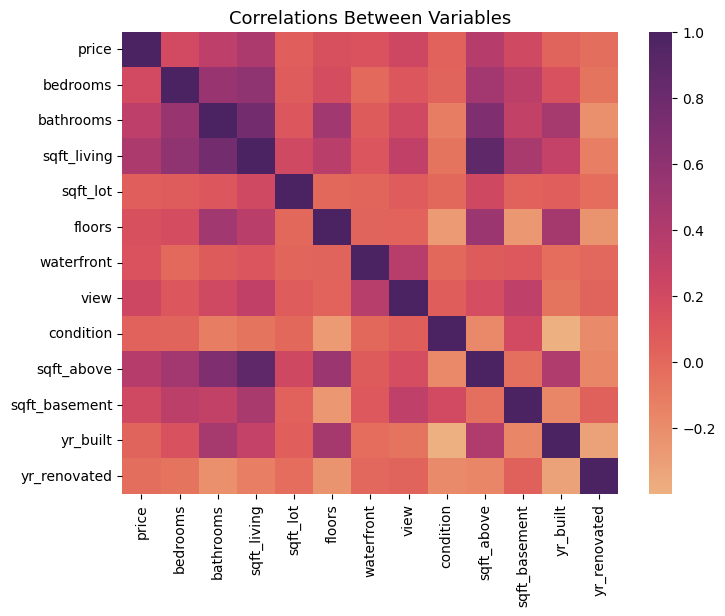

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(df_shuffled.corr(), cmap="flare")
plt.title("Correlations Between Variables", size=13)
plt.show()

### 2. Models

In [58]:
X = df_shuffled['sqft_living'].to_numpy().reshape(-1, 1)
y = df_shuffled["price"].to_numpy().reshape(-1, 1)

In [59]:
X_train, y_train, X_test, y_test=train_test_split(X, y, test_size=.5, random_state=42)

In [60]:
print(X_train.shape)
print(y_train.shape)

(2300, 1)
(2300, 1)


In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

def evaluation(y, prediction):
    mse = mean_squared_error(y, prediction)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)
    rmse = np.sqrt(mse)
    return mse, mae, rmse, r2

In [63]:
results_df = pd.DataFrame(columns=["Model","MSE","MAE","R2 Score","RMSE","RMSE (Cross-Validation)"])

## Machine Laerning Model

### Linear Regression

In [64]:
lr_pred = lr.predict(X_test)

mse, mae, rmse, r2 = evaluation(y_test, lr_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("-"*30)
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MSE": mse, "MAE": mae, "R2 Score": r2, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val}
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

MSE: 818525444767.4104
MAE: 559484.8964662935
R2 Score: -0.6191099682440273
RMSE: 904723.9605357042
------------------------------
RMSE Cross-Validation: 439857.5770386864


### Ridge Regression

In [65]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [66]:
ridge_pred = ridge.predict(X_test)

mse, mae, rmse, r2 = evaluation(y_test, ridge_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("-"*30)
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MSE": mse, "MAE": mae, "R2 Score": r2, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val}
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

MSE: 818525444767.2015
MAE: 559484.896466112
R2 Score: -0.6191099682436141
RMSE: 904723.9605355888
------------------------------
RMSE Cross-Validation: 439857.5770386864


### Lasso Regression

In [67]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [68]:
lasso_pred = lasso.predict(X_test)

mse, mae, rmse, r2 = evaluation(y_test, lasso_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("-"*30)
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MSE": mse, "MAE": mae, "R2 Score": r2, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val}
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

MSE: 818524743722.3214
MAE: 559484.2877150382
R2 Score: -0.6191085815197672
RMSE: 904723.5730997183
------------------------------
RMSE Cross-Validation: 439857.5770386864


### Support Vector Machine (SVM)

In [69]:
svr = SVR(C=100)
svr.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [70]:
svr_pred = svr.predict(X_test)

mse, mae, rmse, r2 = evaluation(y_test, svr_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("-"*30)
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MSE": mse, "MAE": mae, "R2 Score": r2, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val}
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

MSE: 818263266203.2007
MAE: 559258.2867055418
R2 Score: -0.6185913576993147
RMSE: 904579.0547006937
------------------------------
RMSE Cross-Validation: 439857.5770386864


## Decision Tree Regressor

In [73]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [75]:
decisiontree_pred = clf.predict(X_test)

mse, mae, rmse, r2 = evaluation(y_test, decisiontree_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("-"*30)
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Dicision Tree Regressor","MSE": mse, "MAE": mae, "R2 Score": r2, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val}
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

MSE: 817416291098.0487
MAE: 558516.5028741569
R2 Score: -0.6169159719866619
RMSE: 904110.773687632
------------------------------
RMSE Cross-Validation: 439857.5770386864


## Random Forest Regressor

In [82]:
random_forest = RandomForestRegressor(n_estimators=1000)
random_forest.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6216\902096268.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000)

In [83]:
randforest_pred = random_forest.predict(X_test)

mse, mae, rmse, r2 = evaluation(y_test, randforest_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("-"*30)
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Random Forest Regressor","MSE": mse, "MAE": mae, "R2 Score": r2, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val}
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

MSE: 817615284713.59
MAE: 558690.8750828528
R2 Score: -0.6173095975588412
RMSE: 904220.8163460903
------------------------------
RMSE Cross-Validation: 439857.5770386864


## Polynomial Regression (Degree = 2)

In [112]:
poly_reg = PolynomialFeatures(degree=0)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

In [113]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_2d, y_train)

LinearRegression()

In [114]:
linear_reg = linear_reg.predict(X_test_2d)

mse, mae, rmse, r2 = evaluation(y_test, linear_reg)
print("MSE:", mse)
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("-"*30)
rmse_cross_val = rmse_cv(lr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MSE": mse, "MAE": mae, "R2 Score": r2, "RMSE": rmse, "RMSE (Cross-Validation)": rmse_cross_val}
results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

MSE: 818109230021.0825
MAE: 559123.3049686749
R2 Score: -0.6182866615905596
RMSE: 904493.9082277351
------------------------------
RMSE Cross-Validation: 439857.5770386864


## Model Comparison
##### The lower the Root Mean Squared Error (RMSE) means the model is performing well.

In [120]:
results_df.sort_values(by="RMSE (Cross-Validation)")

,Model,MSE,MAE,R2 Score,RMSE,RMSE (Cross-Validation)
0,LinearRegression,8.185254e+11,5.594849e+05,-6.191100e-01,9.047240e+05,439857.577039
16,Polynomial Regression (degree=2),1.531312e+55,1.595003e+26,-3.029061e+43,3.913199e+27,439857.577039
15,Polynomial Regression (degree=2),3.828883e+32,1.800826e+15,-7.573842e+20,1.956753e+16,439857.577039
14,Polynomial Regression (degree=2),8.185254e+11,5.594849e+05,-6.191100e-01,9.047240e+05,439857.577039
13,Polynomial Regression (degree=2),1.403493e+12,8.127130e+05,-1.776224e+00,1.184691e+06,439857.577039
12,Polynomial Regression (degree=2),1.403493e+12,8.127130e+05,-1.776224e+00,1.184691e+06,439857.577039
11,Polynomial Regression (degree=2),8.176153e+11,5.586909e+05,-6.173096e-01,9.042208e+05,439857.577039
10,Polynomial Regression (degree=2),8.176153e+11,5.586909e+05,-6.173096e-01,9.042208e+05,439857.577039
17,Polynomial Regression (degree=2),1.403493e+12,8.127130e+05,-1.776224e+00,1.184691e+06,439857.577039
9,Random Forest Regressor,8.176153e+11,5.586909e+05,-6.173096e-01,9.042208e+05,439857.577039


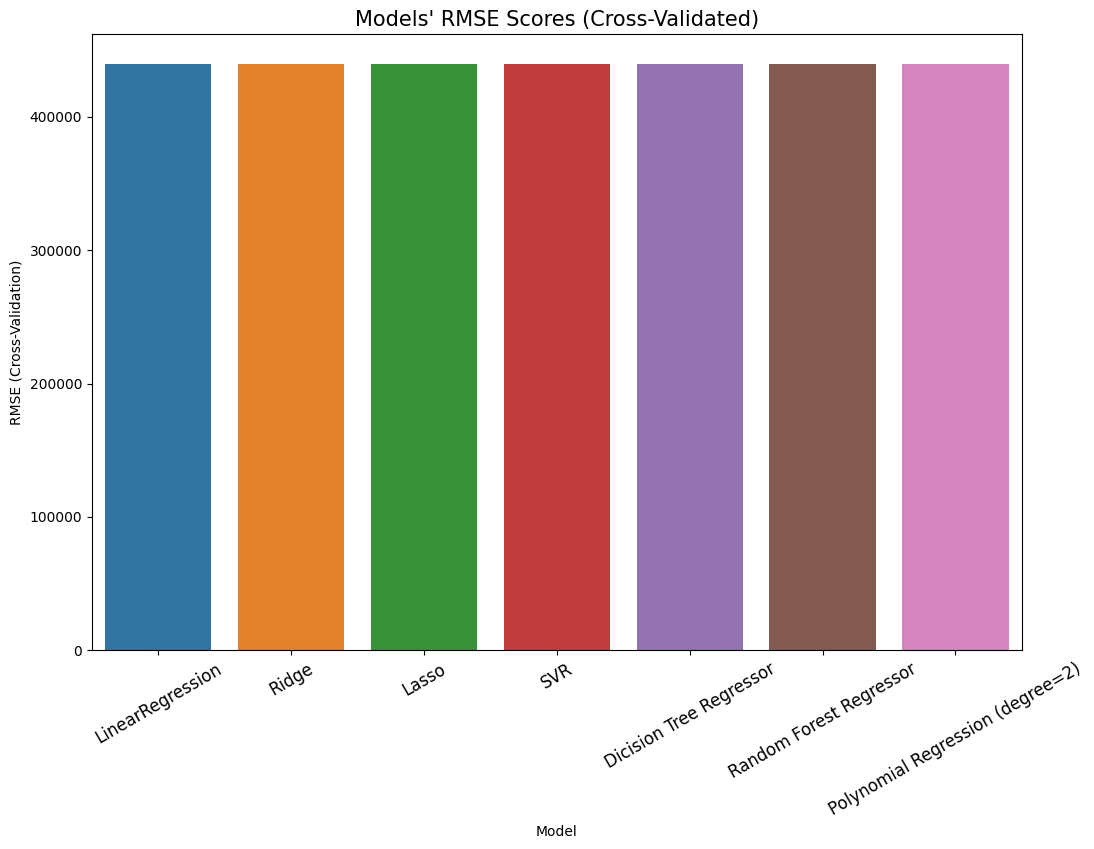

In [119]:
plt.figure(figsize=(12,8))
sns.barplot(x=results_df["Model"], y=results_df["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()